In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
#np.set_printoptions(threshold=np.nan)


In [8]:
#Importing DataSet 
dataset = pd.read_csv("../../data/kc_house_data.csv")
space=dataset['sqft_living']
price=dataset['price']
print("Shape of dataset = ", dataset.shape)
dataset.sample(10)

Shape of dataset =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5628,3291800660,20150313T000000,406000.0,3,1.75,1390,7904,1.0,0,0,...,7,1390,0,1985,0,98056,47.4892,-122.181,1910,7904
5368,7215900020,20141209T000000,1600000.0,4,3.50,4060,9486,2.0,0,0,...,10,4060,0,2005,0,98033,47.6634,-122.200,2410,9486
1871,1887500045,20141226T000000,247500.0,4,2.00,2460,5921,1.0,0,0,...,7,1230,1230,1948,0,98002,47.3080,-122.209,1260,6648
6290,9826701665,20140725T000000,550000.0,3,2.50,2340,4200,1.5,0,0,...,7,1540,800,1906,0,98122,47.6033,-122.303,1590,4200
2238,1704900135,20141111T000000,315000.0,2,1.00,840,5087,1.0,0,0,...,7,840,0,1925,0,98118,47.5557,-122.278,1590,5087
20850,2211300260,20150313T000000,367000.0,3,2.50,2828,4050,2.0,0,0,...,8,2828,0,2013,0,98030,47.3820,-122.197,2513,4507
12433,4019301160,20140627T000000,755000.0,5,2.50,3260,24300,1.5,0,1,...,8,2310,950,1950,0,98155,47.7587,-122.274,2390,32057
7134,320069049,20140514T000000,305000.0,4,1.50,1590,131551,1.0,0,3,...,7,1590,0,1966,0,98022,47.2558,-122.024,2280,108028
9018,267020090,20140818T000000,580000.0,5,2.50,3110,15783,1.0,0,0,...,8,1720,1390,1974,0,98052,47.6301,-122.103,2550,12220
3071,5652601425,20150423T000000,595000.0,4,2.50,2030,10722,1.0,0,0,...,7,1100,930,1967,0,98115,47.6955,-122.301,1610,9134


In [15]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)

#Splitting the data into Train and Test
#1/3 will be test set
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)



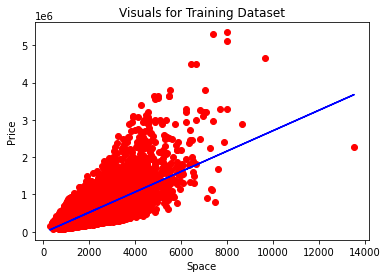

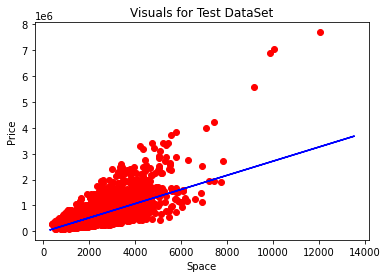

In [16]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Predicting the prices
pred = regressor.predict(xtest)

#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [26]:
print(xtrain)
print(ytrain)
print(xtrain.reshape(1,-1)[0])


[[1260]
 [1320]
 [ 920]
 ...
 [2360]
 [2370]
 [2380]]
[465750. 575000. 212500. ... 431000. 411000. 699900.]
[1260 1320  920 ... 2360 2370 2380]


In [39]:
reg_train = np.polyfit(xtrain.reshape(1,-1)[0], ytrain, deg=1)
reg_test = np.polyfit(xtest.reshape(1,-1)[0], ytest, deg=1)

In [37]:
print(reg_train)

[   273.80181792 -29039.69073406]


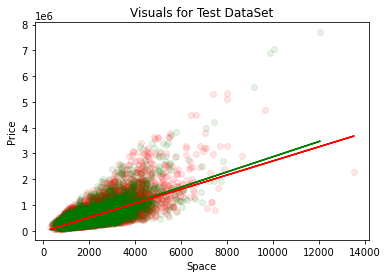

In [44]:
#Visualizing the Test Results 
plt.scatter(xtrain, ytrain, color= 'red', alpha=.1)
plt.scatter(xtest, ytest, color= 'green', alpha=.1)
plt.plot(xtest, xtest*reg_test[0]+reg_test[1], color = 'green')
plt.plot(xtrain, xtrain*reg_train[0]+reg_train[1], color = 'red')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()